<a href="https://colab.research.google.com/github/adityayadav4507/Foundation_of_ML/blob/main/24_Lec_momentum_GD_v_s_vanilla_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a qudratic loss function

we define the loss function which look like this we said

In [ ]:
def quadratic_loss(x,y):
  return x**2 + 10*y**2

# Gradient of loss function  

In [ ]:
def quadratic_gradient(x,y):
  dx=2*x
  dy=20*y
  return np.array([dx,dy])

# Batch Gradient Descent(BGD)

In [ ]:
def BGD(grad_fun,eta,epochs , starting_point):
  x , y = starting_point  # x and y are parameters of theta
  path = [(x,y)]           # keep track of x and y
  losses= [quadratic_loss(x,y)] # initilize the losses with list
  for i in range(epochs):
    grad = grad_fun(x,y)
    x -= eta*grad[0]
    y -=eta*grad[1]
    path.append((x,y))
    losses.append(quadratic_loss(x,y)) # append the new loss (add new loss at the end)
  return np.array(path) , losses

# Gradient Descent with momentum(GDM)

In [ ]:
from os import path
def GDM(grad_fun , eta ,beta , epochs, starting_point):
  x,y= starting_point
  v = np.array([0,0])
  path= [(x,y)]
  losses = [quadratic_loss(x,y)]
  for i in range(epochs):
    grad = grad_fun(x,y)
    v = beta*v + (1-beta)*grad
    x -= v[0]*eta               #v[0] momentum in X direction
    y -= v[1]*eta

    path.append((x,y))
    losses.append(quadratic_loss(x,y))
  return np.array(path) , losses

# visualization part of paths

In [ ]:
def plot_paths(function , paths , labels , title):
    x, y = np.meshgrid(np.linspace(-2,2,400),np.linspace(-2,2,400))
    z = function(x,y)

    plt.figure(figsize=(8,6))
    plt.contour(x,y,z, levels=50 ,camp='jet')

    for path , label in zip(paths , labels ):
      plt.plot(path[:,0] , path[:,1] , label=label)
      plt.scatter(path[0,0] , path[0,1] , c='g', label ="start")
      plt.scatter(path[-1,0] , path[-1,1] , c='r' , label="end")

    plt.title(title)
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


# Visualization of losses

In [ ]:
def plot_losses(losses , labels , title):
  plt.figure(figsize=(8,6))
  for loss , label in zip(losses , labels):
    plt.plot(loss , label=label)

  plt.title(title)
  plt.legend()
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.show()

# Parameter

In [ ]:
eta_bgd=0.1 #learning rate of bgd
eta_momentum=0.1  # learning rate of momentum
beta = 0.9  # momentum coefficent
starting_point=(1.5,1.5)  # parameter staring point in loss function
epoch=50  # no of iteration perform

# Run optimization

In [ ]:
path_bgd , loss_bgd = BGD(quadratic_gradient , eta_bgd , epoch , starting_point)
path_momentum , loss_momentum = GDM(quadratic_gradient , eta_momentum , beta , epoch , starting_point)

# Plot result

<ipython-input-262-2a77a9e3cca5>:6: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contour(x,y,z, levels=50 ,camp='jet')


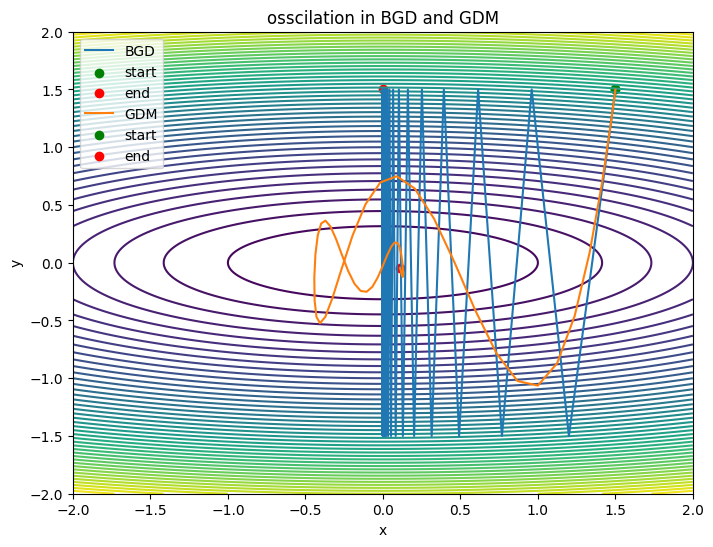

In [ ]:
plot_paths(quadratic_loss , [path_bgd , path_momentum] , ['BGD' , 'GDM'] , "osscilation in BGD and GDM")

# Plot losses

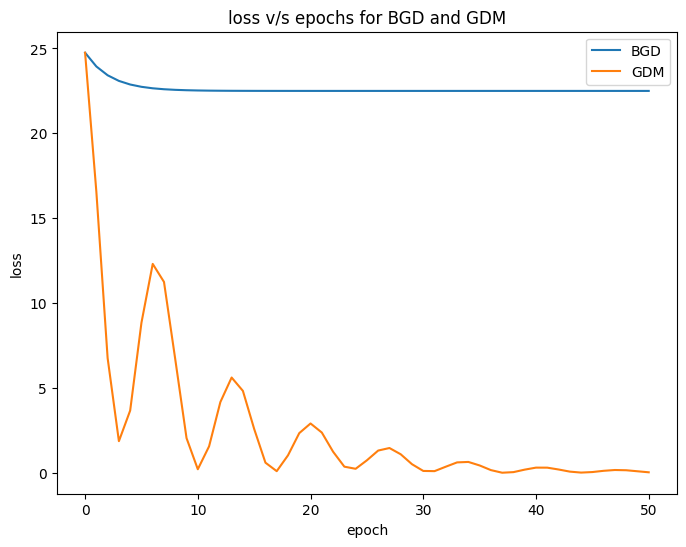

In [ ]:
plot_losses([loss_bgd , loss_momentum] , ['BGD' , 'GDM'] , "loss v/s epochs for BGD and GDM")